## Isaac Burmingham
### Prediction Models & Anomaly Detection

This notebook takes the .npy data from the 4 selected datasets and fits them to LSTM neural networks to create "normal" models of the dataset. Then Nonparametric Dynamic Thresholding is employed as described by NASA JPL, in order to find detected anomalies. <br/>
Analysis will be broken down by section for each dataset

Note: Please make sure you have run the AlgorithmModeling notebook to generate the .py files that are called in this file.

In [27]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import glob 
import os
import re
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

%autoreload 2
from algorithm_modeling import LSTM_model
import nonparametric_dynamic_thresholding as npt
import custom_functions as cf

In [29]:
appliances_arr = np.load('Appliances_scaled_df.npy')
thruster_arr = np.load('thruster_scaled_df.npy')
lasp_arr = np.load('LASP_scaled_df.npy')
pw_arr = np.load('PowerWeather_scaled_df.npy')

### Appliances Dataset

For this dataset, we want to train a model that predicts the energy consumed by household appliances.

In [30]:
24*60 / 10

144.0

How many rows we need to predict the next 24 hours, since each row is at 10 min intervals

Need to create the feature and label dataset. We want to predict the energy value 24 hours into the future (supervised learning). <br/>
for features we should remove readings from last 24 hrs <br/>
for labels, we should remove readings from first 24 hrs

In [31]:
features = appliances_arr[:][:-144] # we can include the label value in the features since it is prior values
label = appliances_arr[:,0][144:] 

Length: How many records to take into account <br />
Batch_size: what is time frame of the sub series 

In [47]:
(12*7*60)/10

504.0

In [33]:
trainX, testX, trainY, testY = train_test_split(features, label, test_size=0.30, random_state=17, shuffle = False)

timesteps = ((24*7*60)/10) # Use previous 7 days, to predict 1 day ahead


In [34]:
app_train_generator = TimeseriesGenerator(trainX, trainY, \
                                      length=int(timesteps), sampling_rate=1, batch_size=int(timesteps))
app_test_generator = TimeseriesGenerator(testX, testY, \
                                     length=int(timesteps), sampling_rate=1, batch_size=int(timesteps))

In [35]:
model, history = LSTM_model(8,app_train_generator,app_test_generator,\
                            epochs=100,learning_rate=0.001,dropout=0.4,alpha=0.5)

Epoch 1/100
13/13 - 10s - loss: 0.3483 - mae: 0.4905 - mse: 0.3483 - val_loss: 0.1436 - val_mae: 0.3329 - val_mse: 0.1436
Epoch 2/100
13/13 - 7s - loss: 0.1104 - mae: 0.2632 - mse: 0.1104 - val_loss: 0.0323 - val_mae: 0.1483 - val_mse: 0.0323
Epoch 3/100
13/13 - 7s - loss: 0.0925 - mae: 0.2386 - mse: 0.0925 - val_loss: 0.0339 - val_mae: 0.1507 - val_mse: 0.0339
Epoch 4/100
13/13 - 7s - loss: 0.0661 - mae: 0.2018 - mse: 0.0661 - val_loss: 0.0354 - val_mae: 0.1567 - val_mse: 0.0354
Epoch 5/100
13/13 - 8s - loss: 0.0551 - mae: 0.1847 - mse: 0.0551 - val_loss: 0.0279 - val_mae: 0.1375 - val_mse: 0.0279
Epoch 6/100
13/13 - 7s - loss: 0.0473 - mae: 0.1691 - mse: 0.0473 - val_loss: 0.0226 - val_mae: 0.1223 - val_mse: 0.0226
Epoch 7/100
13/13 - 7s - loss: 0.0411 - mae: 0.1580 - mse: 0.0411 - val_loss: 0.0197 - val_mae: 0.1132 - val_mse: 0.0197
Epoch 8/100
13/13 - 7s - loss: 0.0348 - mae: 0.1433 - mse: 0.0348 - val_loss: 0.0174 - val_mae: 0.1058 - val_mse: 0.0174
Epoch 9/100
13/13 - 7s - loss: 

Epoch 69/100
13/13 - 7s - loss: 0.0103 - mae: 0.0626 - mse: 0.0103 - val_loss: 0.0069 - val_mae: 0.0505 - val_mse: 0.0069
Epoch 70/100
13/13 - 7s - loss: 0.0103 - mae: 0.0626 - mse: 0.0103 - val_loss: 0.0069 - val_mae: 0.0502 - val_mse: 0.0069
Epoch 71/100
13/13 - 8s - loss: 0.0104 - mae: 0.0622 - mse: 0.0104 - val_loss: 0.0069 - val_mae: 0.0500 - val_mse: 0.0069
Epoch 72/100
13/13 - 7s - loss: 0.0102 - mae: 0.0618 - mse: 0.0102 - val_loss: 0.0069 - val_mae: 0.0501 - val_mse: 0.0069
Epoch 73/100
13/13 - 7s - loss: 0.0102 - mae: 0.0619 - mse: 0.0102 - val_loss: 0.0068 - val_mae: 0.0500 - val_mse: 0.0068
Epoch 74/100
13/13 - 7s - loss: 0.0101 - mae: 0.0618 - mse: 0.0101 - val_loss: 0.0068 - val_mae: 0.0500 - val_mse: 0.0068
Epoch 75/100
13/13 - 7s - loss: 0.0101 - mae: 0.0617 - mse: 0.0101 - val_loss: 0.0068 - val_mae: 0.0500 - val_mse: 0.0068
Epoch 76/100
13/13 - 7s - loss: 0.0102 - mae: 0.0620 - mse: 0.0102 - val_loss: 0.0068 - val_mae: 0.0499 - val_mse: 0.0068
Epoch 77/100
13/13 - 8s 

Finding that this dataset is more sensitive to the number of units in the LSTM. Too many causes overfitting quickly. The overfit model makes the predictions look better, but overall bad performance.

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 1120      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________


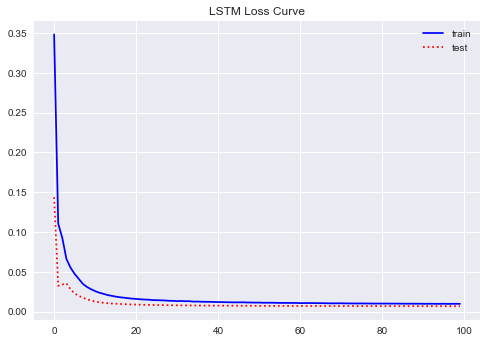

In [37]:
plt.plot(history.history['loss'],'b-',label='train')
plt.plot(history.history['val_loss'],'r:',label='test')
plt.title('LSTM Loss Curve')
plt.legend()
plt.show()

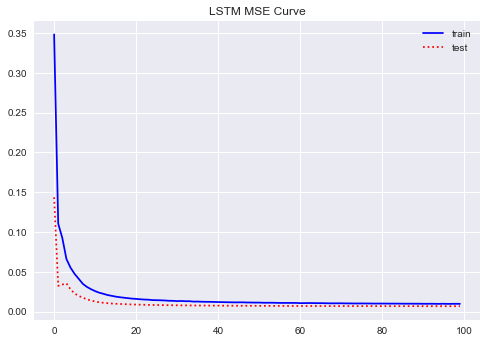

In [38]:
plt.plot(history.history['mse'],'b-',label='train')
plt.plot(history.history['val_mse'],'r:',label='test')
plt.title('LSTM MSE Curve')
plt.legend()
plt.show()

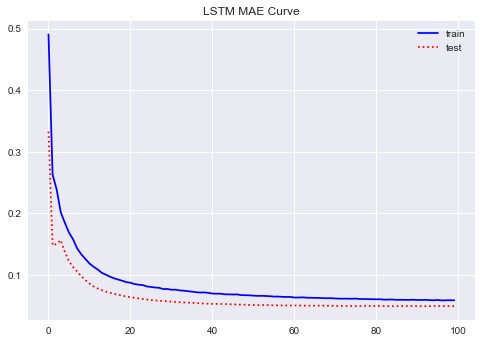

In [39]:
plt.plot(history.history['mae'],'b-',label='train')
plt.plot(history.history['val_mae'],'r:',label='test')
plt.title('LSTM MAE Curve')
plt.legend()
plt.show()

In [40]:
app_mse, app_val_mse = np.mean(history.history['mse']),np.mean(history.history['val_mse'])

All of our diagnostic plots show that the model is training well, and accurately.

In [41]:
train_predictions = model.predict(app_train_generator)
test_predictions = model.predict(app_test_generator)

In [42]:
yhat_train_p, yhat_test_p = cf.reshape_predictions(label,train_predictions,test_predictions,timesteps)

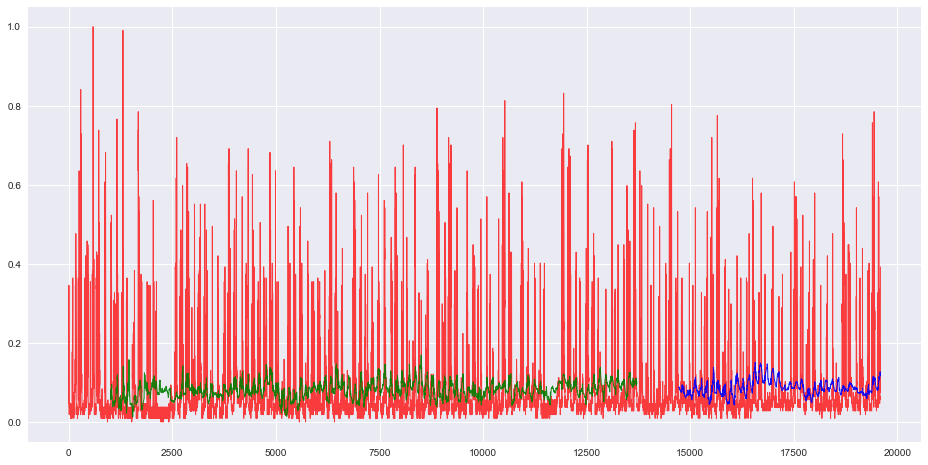

In [43]:
fig = plt.figure(figsize=(16,8))
plt.style.use('seaborn')
palette = plt.get_cmap('Set1')

plt.plot(label, marker='', color='red', linewidth=1, alpha=0.75, label='actual')
plt.plot(yhat_train_p, marker='', color='green', linewidth=1, alpha=0.9, label='training predictions')
plt.plot(yhat_test_p, marker='', color='blue', linewidth=1, alpha=0.9, label='testing predictions')

Increasing the number of units in the LSTM makes these predictions closer to the true value, but the model overfits. Since the primary goal is anomaly detection, it is better to have an accurate model than an overfit model so that our errors are more smooth and true anomalies can still be caught with the thresholding done next.

In [44]:
ts = pd.Series(label[int(timesteps):len(train_predictions)+int(timesteps)])
norm_model = pd.Series(yhat_train_p[int(timesteps):len(train_predictions)+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p)[int(timesteps):len(train_predictions)+int(timesteps)])

Detected outliers (energy_df): 1383


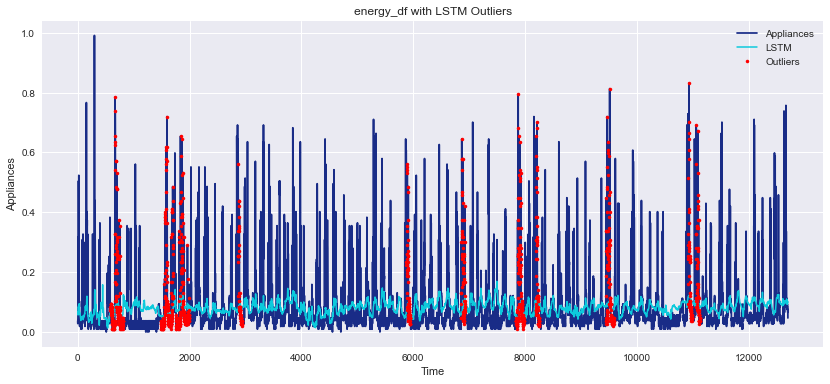

<Figure size 576x396 with 0 Axes>

In [45]:
app_anom = npt.detect_anomalies(ts, norm_model,\
                     'energy_df', 'Appliances', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.1)

Although the predictions look to be underestimating, what matters here is that the errors calculated do not deviate from the mean and standard deviation of the entirety of the errors. This deviation is what finds the anomalies, so even though it looks like our model didn't perform well, the diagnostic plots indicate a good model fit, and the anomalies detected above do not seem far off, although being that it is unsupervised anomaly detection, it is harder to gauge our accuracy.

Checking the test results

In [48]:
ts = pd.Series(label[len(test_predictions)+(int(timesteps)*2):len(label)])
norm_model = pd.Series(yhat_test_p[len(test_predictions)+(int(timesteps)*2):len(label)])
errors = pd.Series(npt.get_errors(label,yhat_test_p)[len(test_predictions)+(int(timesteps)*2):len(label)])

Detected outliers (energy_df): 70


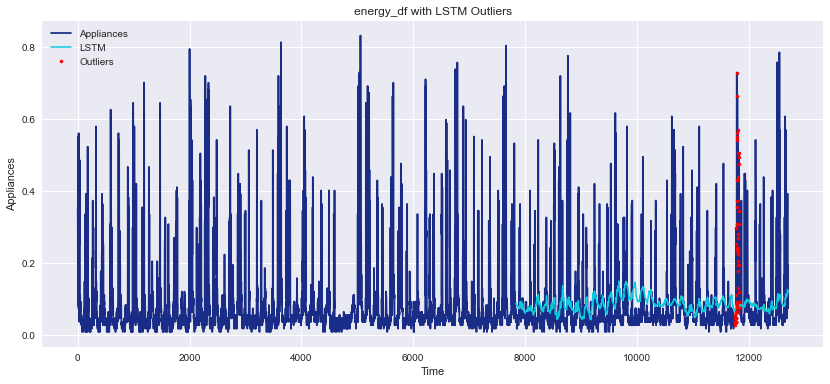

<Figure size 576x396 with 0 Axes>

In [49]:
app_anom = npt.detect_anomalies(ts, norm_model,\
                     'energy_df', 'Appliances', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.1)

### LASP Dataset

The LASP dataset contains 4 inputs, and 4 outputs. We use the sensor data to predict each of the sensors 1 day ahead, using the the previous years values. This is a sequence of 56 timesteps being predicted at once. The following follows a similar approach as the above dataset, but since there are 4 outputs, there are 4 predictions, and so we can detect the anomalies on those charts individually - while still including that the predictions considered the feature interactions between sensors.

In [203]:
(24*365)/3

2920.0

In [204]:
(24*7)/3

56.0

In [205]:
features = lasp_arr[:][:-56]
label = lasp_arr[:][56:] 

In [206]:
# Since this is unsupervised, our Y label is just the dataset again
trainX, testX, trainY, testY = train_test_split(features, label, test_size=0.30, random_state=17, shuffle = False)

In [207]:
n_inputs = 4 
timesteps = int((24*365)/3) #Use the last year's worth of data to predict 1 day ahead (Rows are 3H intervals)

train_lasp_generator = TimeseriesGenerator(trainX, trainY,\
                                      length=n_inputs, sampling_rate=1, batch_size=timesteps)
test_lasp_generator = TimeseriesGenerator(testX, testY,\
                                     length=n_inputs, sampling_rate=1, batch_size=timesteps)

In [208]:
model, history = LSTM_model(250,train_lasp_generator,test_lasp_generator,\
                            epochs=50,n_outputs=4,learning_rate=0.0015,dropout=0.3)

Epoch 1/50
11/11 - 3s - loss: 0.1391 - mae: 0.2816 - mse: 0.1391 - val_loss: 0.0458 - val_mae: 0.1691 - val_mse: 0.0458
Epoch 2/50
11/11 - 2s - loss: 0.0198 - mae: 0.1118 - mse: 0.0198 - val_loss: 0.0185 - val_mae: 0.0970 - val_mse: 0.0185
Epoch 3/50
11/11 - 2s - loss: 0.0094 - mae: 0.0763 - mse: 0.0094 - val_loss: 0.0122 - val_mae: 0.0645 - val_mse: 0.0122
Epoch 4/50
11/11 - 2s - loss: 0.0078 - mae: 0.0691 - mse: 0.0078 - val_loss: 0.0103 - val_mae: 0.0709 - val_mse: 0.0103
Epoch 5/50
11/11 - 2s - loss: 0.0063 - mae: 0.0615 - mse: 0.0063 - val_loss: 0.0099 - val_mae: 0.0583 - val_mse: 0.0099
Epoch 6/50
11/11 - 2s - loss: 0.0058 - mae: 0.0587 - mse: 0.0058 - val_loss: 0.0095 - val_mae: 0.0634 - val_mse: 0.0095
Epoch 7/50
11/11 - 2s - loss: 0.0055 - mae: 0.0573 - mse: 0.0055 - val_loss: 0.0090 - val_mae: 0.0575 - val_mse: 0.0090
Epoch 8/50
11/11 - 2s - loss: 0.0052 - mae: 0.0555 - mse: 0.0052 - val_loss: 0.0087 - val_mae: 0.0585 - val_mse: 0.0087
Epoch 9/50
11/11 - 2s - loss: 0.0050 - m

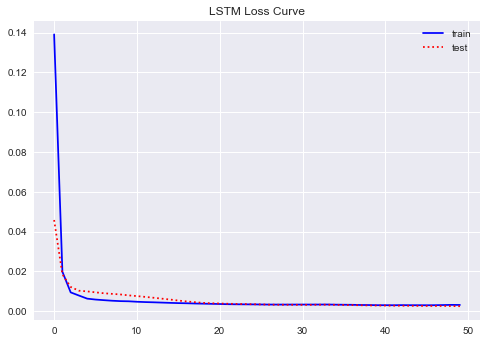

In [209]:
plt.plot(history.history['loss'],'b-',label='train')
plt.plot(history.history['val_loss'],'r:',label='test')
plt.legend()
plt.title('LSTM Loss Curve')
plt.show()

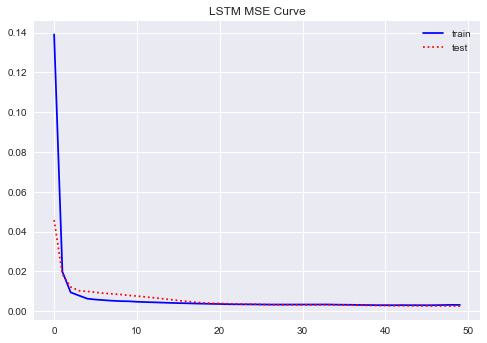

In [210]:
plt.plot(history.history['mse'],'b-',label='train')
plt.plot(history.history['val_mse'],'r:',label='test')
plt.legend()
plt.title('LSTM MSE Curve')
plt.show()

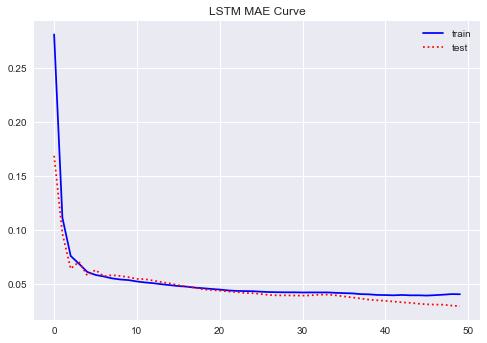

In [211]:
plt.plot(history.history['mae'],'b-',label='train')
plt.plot(history.history['val_mae'],'r:',label='test')
plt.title('LSTM MAE Curve')
plt.legend()
plt.show()

In [212]:
lasp_mse, lasp_val_mse = np.mean(history.history['mse']),np.mean(history.history['val_mse'])

The model does extremely well and learns the data very quickly, indicating the model might be too complicated for the dataset. Lets see how the predictions did and their prediction errors.

In [213]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 250)               255000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 1004      
Total params: 256,004
Trainable params: 256,004
Non-trainable params: 0
_________________________________________________________________


In [214]:
# 4 outputs
train_predictions = model.predict(train_lasp_generator)
test_predictions = model.predict(test_lasp_generator)

In [215]:
trans_label = np.transpose(label)

In [216]:
label_df = pd.DataFrame(label)

In [217]:
yhat_train_p0, yhat_test_p0 = cf.reshape_predictions(label,train_predictions[:,0],test_predictions[:,0],n_inputs)
yhat_train_p1, yhat_test_p1 = cf.reshape_predictions(label,train_predictions[:,1],test_predictions[:,1],n_inputs)
yhat_train_p2, yhat_test_p2 = cf.reshape_predictions(label,train_predictions[:,2],test_predictions[:,2],n_inputs)
yhat_train_p3, yhat_test_p3 = cf.reshape_predictions(label,train_predictions[:,3],test_predictions[:,3],n_inputs)

A more zoomed in plot of one of the features, the predictions seem to match the data fairly well

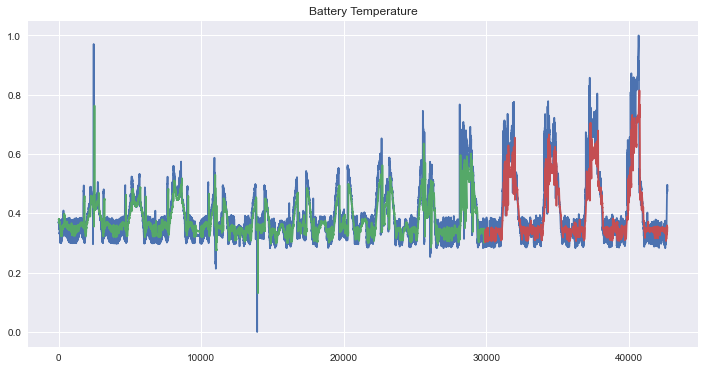

In [218]:
label_df[0].plot(figsize=(12,6))
plt.plot(yhat_train_p0)
plt.plot(yhat_test_p0)
plt.title('Battery Temperature')
plt.show()

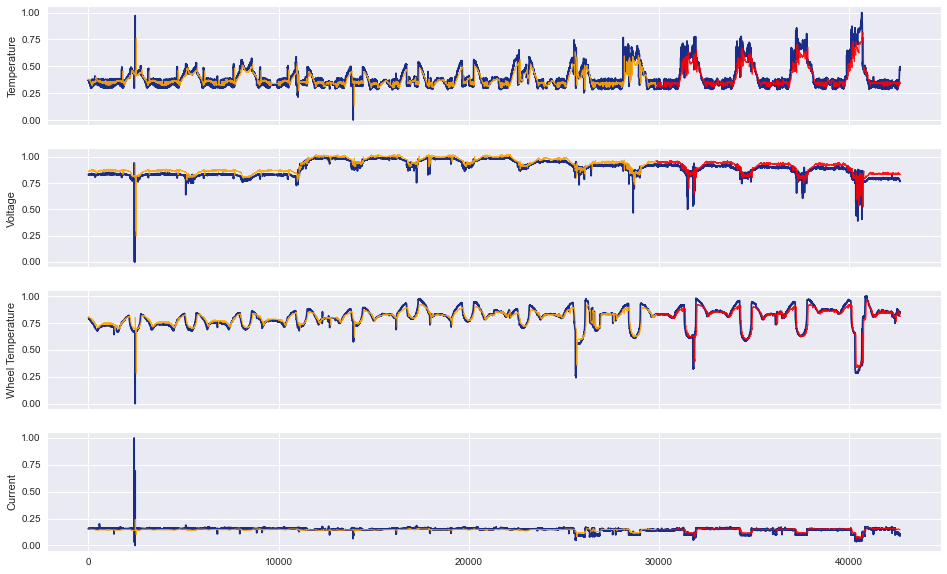

In [219]:
fig, axs = plt.subplots(4,figsize=(16,10),sharex=True)

axs[0].plot(label_df[0],color='#192C87')
axs[1].plot(trans_label[1], color='#192C87')
axs[2].plot(trans_label[2], color='#192C87')
axs[3].plot(trans_label[3], color='#192C87')


axs[0].set_ylabel("Temperature")
axs[1].set_ylabel("Voltage")
axs[2].set_ylabel("Wheel Temperature")
axs[3].set_ylabel("Current")

axs[0].plot(yhat_train_p0, color='orange', linewidth=1, alpha=0.9, label='training predictions')
axs[1].plot(yhat_train_p1, color='orange', linewidth=1, alpha=0.9, label='training predictions')
axs[2].plot(yhat_train_p2, color='orange', linewidth=1, alpha=0.9, label='training predictions')
axs[3].plot(yhat_train_p3, color='orange', linewidth=1, alpha=0.9, label='training predictions')

axs[0].plot(yhat_test_p0, color='red', linewidth=1, alpha=0.9, label='training predictions')
axs[1].plot(yhat_test_p1, color='red', linewidth=1, alpha=0.9, label='training predictions')
axs[2].plot(yhat_test_p2, color='red', linewidth=1, alpha=0.9, label='training predictions')
axs[3].plot(yhat_test_p3, color='red', linewidth=1, alpha=0.9, label='training predictions')

#plt.plot(yhat_test_p, marker='', color='blue', linewidth=1, alpha=0.9, label='testing predictions')

plt.show()

It looks like the model does really well fitting the data and predicting all 4 features at once. 

Detected outliers (LASP Battery Temp Sensor Training Set): 2846


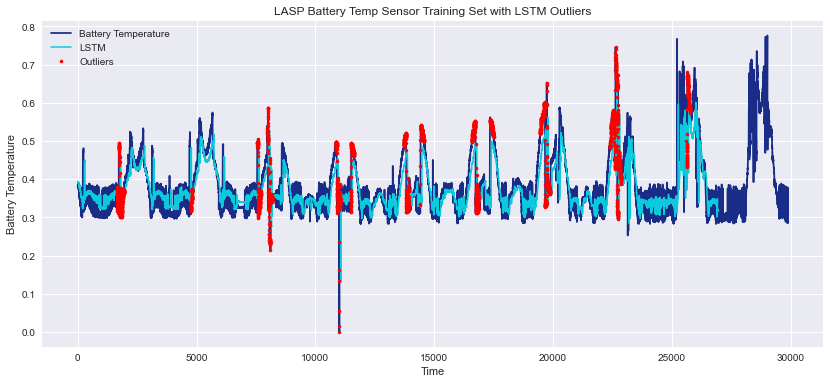

<Figure size 576x396 with 0 Axes>

In [220]:
ts = pd.Series(label[int(timesteps):len(train_predictions[:,0])+int(timesteps)][:,0])
norm_model = pd.Series(yhat_train_p0[int(timesteps):len(train_predictions[:,0])+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p0)[int(timesteps):len(train_predictions[:,0])+int(timesteps)])

batt_anom = npt.detect_anomalies(ts, norm_model,
                     'LASP Battery Temp Sensor Training Set', 'Battery Temperature', 'LSTM', outlier_def='dynamic', num_stds=2,
                                window_size = 30, batch_size=70, smoothing_perc=0.05,p=0.1)

In [221]:
batt_anom['Outlier'].value_counts()

False    27045
True      2846
Name: Outlier, dtype: int64

Detected outliers (LASP Voltage Sensor): 630


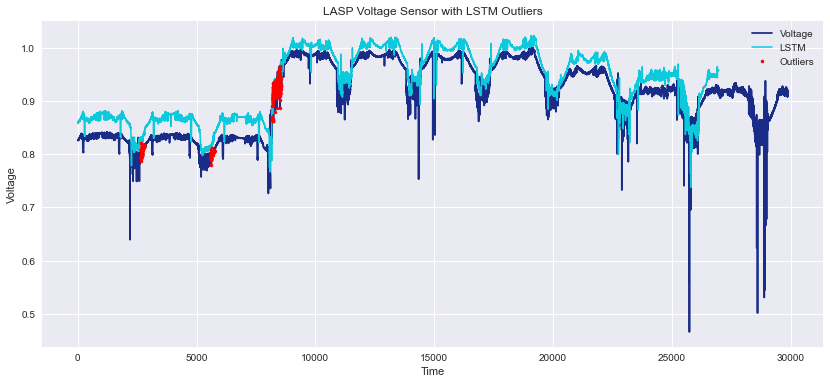

<Figure size 576x396 with 0 Axes>

In [222]:
ts = pd.Series(label[int(timesteps):len(train_predictions[:,1])+int(timesteps)][:,1])
norm_model = pd.Series(yhat_train_p1[int(timesteps):len(train_predictions[:,1])+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p1)[int(timesteps):len(train_predictions[:,1])+int(timesteps)])

volt_anom = npt.detect_anomalies(ts, norm_model,\
                     'LASP Voltage Sensor', 'Voltage', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.1)

In [223]:
volt_anom['Outlier'].value_counts()

False    29261
True       630
Name: Outlier, dtype: int64

It is interesting that the algorithm had found anomalies in the 5000-10000 timesteps, but didn't classify the large dip around time step 25k. Possibly this was orginally classified, but then pruned away in the process.

Detected outliers (LASP Wheel Temperature Sensor): 1774


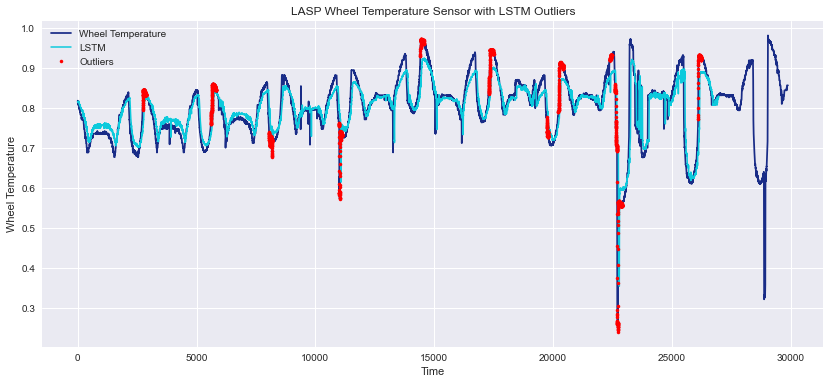

<Figure size 576x396 with 0 Axes>

In [224]:
ts = pd.Series(label[int(timesteps):len(train_predictions[:,2])+int(timesteps)][:,2])
norm_model = pd.Series(yhat_train_p2[int(timesteps):len(train_predictions[:,2])+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p2)[int(timesteps):len(train_predictions[:,2])+int(timesteps)])

wheel_anom = npt.detect_anomalies(ts, norm_model,\
                     'LASP Wheel Temperature Sensor', 'Wheel Temperature', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.1)

In [225]:
wheel_anom['Outlier'].value_counts()

False    28117
True      1774
Name: Outlier, dtype: int64

It looks like dips and shart peaks are classified as anomalies but might be overclassifying, as it seems that the same peak gets continuously classified, although it could be seen as normal oon a macro level. 

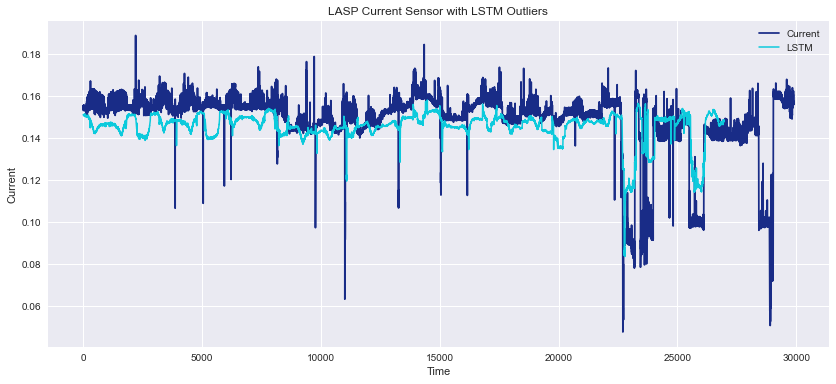

<Figure size 576x396 with 0 Axes>

In [226]:
ts = pd.Series(label[int(timesteps):len(train_predictions[:,3])+int(timesteps)][:,3])
norm_model = pd.Series(yhat_train_p3[int(timesteps):len(train_predictions[:,3])+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p3)[int(timesteps):len(train_predictions[:,3])+int(timesteps)])

curr_anom = npt.detect_anomalies(ts, norm_model,
                     'LASP Current Sensor', 'Current', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.1)

This last feature appears to have a bug where the feature correlation between wheel temperature and current (~0.8) has influenced the trend of the data to follow that of wheel temperature, instead of the current data. This is cause for concern, and should drop the one of the variables for future consideration

### Thruster Dataset

In [74]:
len(thruster_arr) # rows are on 0.01s scale

183011

In [75]:
(0.01*100)

1.0

In [111]:
features = thruster_arr[:][:-1] # prediction of the thruster value 1.0 sec into the future
label = thruster_arr[:][1:] 

In [112]:
# Since this is unsupervised, our Y label is just the dataset again
trainX, testX, trainY, testY = train_test_split(features, label, test_size=0.30, random_state=17, shuffle = False)

In [113]:
n_inputs = 2
timesteps = 60 #Use the last minute worth of data to predict 1 sec ahead 

train_thruster_generator = TimeseriesGenerator(trainX, trainY,\
                                      length=n_inputs, sampling_rate=1, batch_size=timesteps)
test_thruster_generator = TimeseriesGenerator(testX, testY,\
                                     length=n_inputs, sampling_rate=1, batch_size=timesteps)

In [114]:
model, history = LSTM_model(250,train_thruster_generator,test_thruster_generator,\
                            epochs=100,n_outputs=2,learning_rate=0.001,dropout=0.1,alpha=0.5)

Epoch 1/100
2136/2136 - 10s - loss: 0.0109 - mae: 0.0561 - mse: 0.0109 - val_loss: 0.0083 - val_mae: 0.0440 - val_mse: 0.0083
Epoch 2/100
2136/2136 - 8s - loss: 0.0084 - mae: 0.0461 - mse: 0.0084 - val_loss: 0.0081 - val_mae: 0.0404 - val_mse: 0.0081
Epoch 3/100
2136/2136 - 8s - loss: 0.0083 - mae: 0.0447 - mse: 0.0083 - val_loss: 0.0081 - val_mae: 0.0395 - val_mse: 0.0081
Epoch 4/100
2136/2136 - 8s - loss: 0.0082 - mae: 0.0440 - mse: 0.0082 - val_loss: 0.0080 - val_mae: 0.0391 - val_mse: 0.0080
Epoch 5/100
2136/2136 - 8s - loss: 0.0082 - mae: 0.0435 - mse: 0.0082 - val_loss: 0.0080 - val_mae: 0.0403 - val_mse: 0.0080
Epoch 6/100
2136/2136 - 8s - loss: 0.0081 - mae: 0.0429 - mse: 0.0081 - val_loss: 0.0080 - val_mae: 0.0413 - val_mse: 0.0080
Epoch 7/100
2136/2136 - 8s - loss: 0.0081 - mae: 0.0425 - mse: 0.0081 - val_loss: 0.0079 - val_mae: 0.0417 - val_mse: 0.0079
Epoch 8/100
2136/2136 - 8s - loss: 0.0080 - mae: 0.0422 - mse: 0.0080 - val_loss: 0.0079 - val_mae: 0.0403 - val_mse: 0.0079

2136/2136 - 9s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0395 - val_mse: 0.0077
Epoch 67/100
2136/2136 - 10s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0391 - val_mse: 0.0077
Epoch 68/100
2136/2136 - 9s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0393 - val_mse: 0.0077
Epoch 69/100
2136/2136 - 10s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0388 - val_mse: 0.0077
Epoch 70/100
2136/2136 - 9s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0389 - val_mse: 0.0077
Epoch 71/100
2136/2136 - 10s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0393 - val_mse: 0.0077
Epoch 72/100
2136/2136 - 10s - loss: 0.0078 - mae: 0.0396 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0389 - val_mse: 0.0077
Epoch 73/100
2136/2136 - 9s - loss: 0.0078 - mae: 0.0395 - mse: 0.0078 - val_loss: 0.0077 - val_mae: 0.0392 - val_mse: 0.0077
E

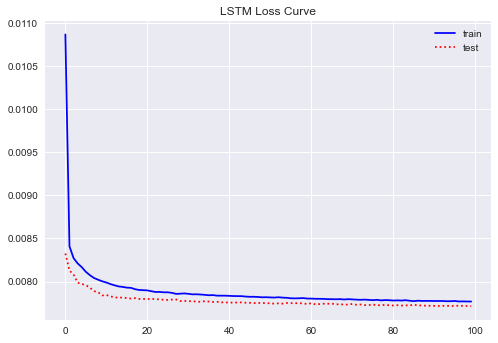

In [115]:
plt.plot(history.history['loss'],'b-',label='train')
plt.plot(history.history['val_loss'],'r:',label='test')
plt.legend()
plt.title('LSTM Loss Curve')
plt.show()

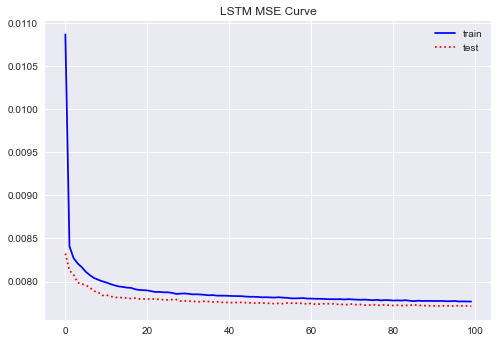

In [116]:
plt.plot(history.history['mse'],'b-',label='train')
plt.plot(history.history['val_mse'],'r:',label='test')
plt.legend()
plt.title('LSTM MSE Curve')
plt.show()

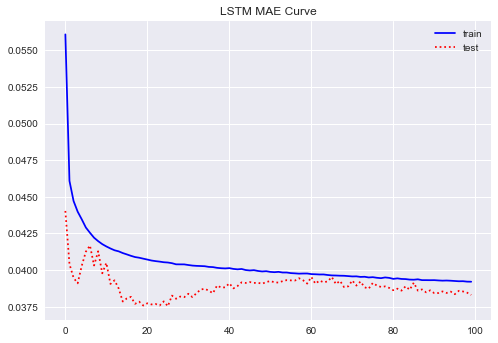

In [117]:
plt.plot(history.history['mae'],'b-',label='train')
plt.plot(history.history['val_mae'],'r:',label='test')
plt.title('LSTM MAE Curve')
plt.legend()
plt.show()

In [118]:
thruster_mse, thruster_val_mse = np.mean(history.history['mse']),np.mean(history.history['val_mse'])

In [119]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 250)               253000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 502       
Total params: 253,502
Trainable params: 253,502
Non-trainable params: 0
_________________________________________________________________


In [120]:
# 2 outputs
train_predictions = model.predict(train_thruster_generator)
test_predictions = model.predict(test_thruster_generator)

In [121]:
trans_label = np.transpose(label)

In [122]:
label_df = pd.DataFrame(label)

In [123]:
yhat_train_p0, yhat_test_p0 = cf.reshape_predictions(label,train_predictions[:,0],test_predictions[:,0],n_inputs)
yhat_train_p1, yhat_test_p1 = cf.reshape_predictions(label,train_predictions[:,1],test_predictions[:,1],n_inputs)

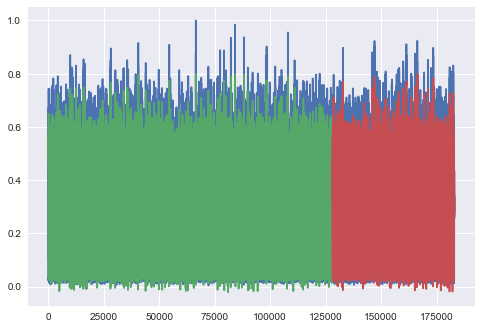

In [124]:
label_df[0].plot()
plt.plot(yhat_train_p0)
plt.plot(yhat_test_p0)
plt.show()

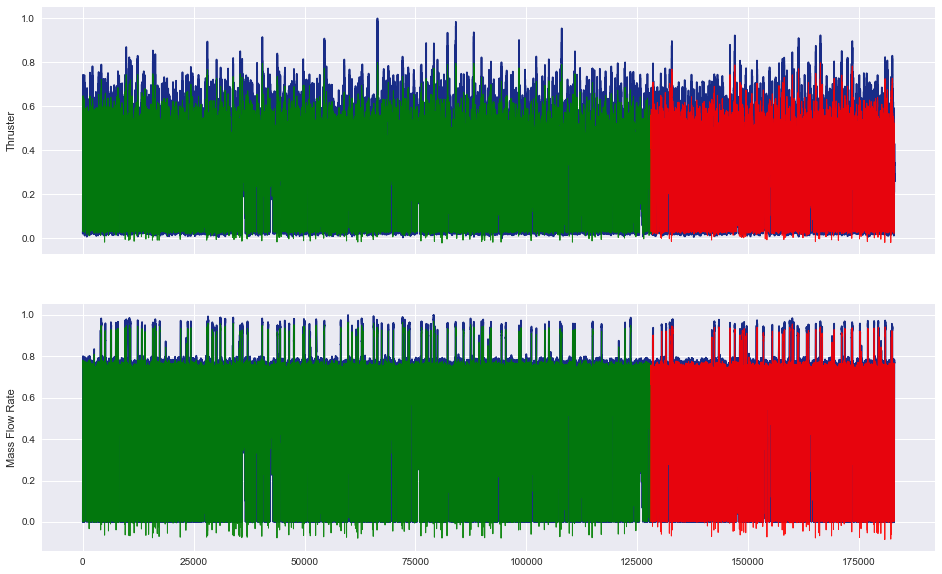

In [125]:
fig, axs = plt.subplots(2,figsize=(16,10),sharex=True)

axs[0].plot(label_df[0],color='#192C87')
axs[1].plot(label_df[1], color='#192C87')


axs[0].set_ylabel("Thruster")
axs[1].set_ylabel("Mass Flow Rate")


axs[0].plot(yhat_train_p0, color='green', linewidth=1, alpha=0.9, label='training predictions')
axs[1].plot(yhat_train_p1, color='green', linewidth=1, alpha=0.9, label='training predictions')

axs[0].plot(yhat_test_p0, color='red', linewidth=1, alpha=0.9, label='training predictions')
axs[1].plot(yhat_test_p1, color='red', linewidth=1, alpha=0.9, label='training predictions')

#plt.plot(yhat_test_p, marker='', color='blue', linewidth=1, alpha=0.9, label='testing predictions')

plt.show()

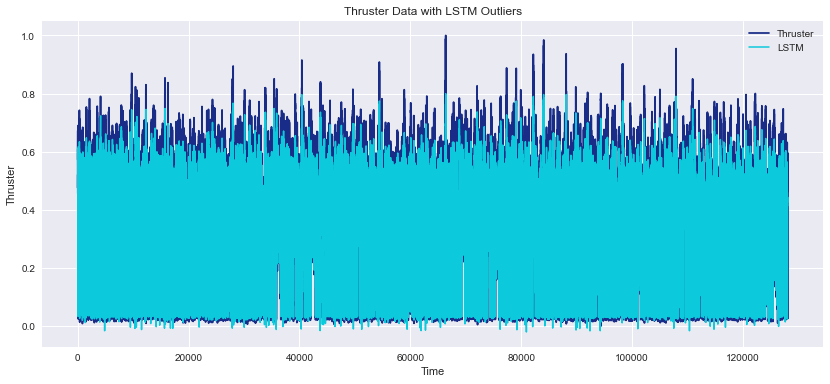

<Figure size 576x396 with 0 Axes>

In [126]:
ts = pd.Series(label[int(timesteps):len(train_predictions[:,0])+int(timesteps)][:,0])
norm_model = pd.Series(yhat_train_p0[int(timesteps):len(train_predictions[:,0])+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p0)[int(timesteps):len(train_predictions[:,0])+int(timesteps)])

thrust_anom = npt.detect_anomalies(ts, norm_model,\
                     'Thruster Data', 'Thruster', 'LSTM', outlier_def='dynamic', num_stds=2)

The data is extremely noisy, but the model seems to do fairly well at predicting accurately the thrust and mfr. Additionally, it is found that there are no anomalies - which was expected as this data is computer simulated. 

### Power Usage With Weather Features Dataset

In [185]:
len(pw_arr) # rows are on 1d

1498

In [186]:
features = pw_arr[:][:-1] # predict 1 time step ahead
label = pw_arr[:,-5][1:] 

In [187]:
# Since this is unsupervised, our Y label is just the dataset again
trainX, testX, trainY, testY = train_test_split(features, label, test_size=0.30, random_state=17, shuffle = False)

In [188]:
n_inputs = 13
timesteps = 14 

train_pw_generator = TimeseriesGenerator(trainX, trainY,\
                                      length=n_inputs, sampling_rate=1, batch_size=timesteps)
test_pw_generator = TimeseriesGenerator(testX, testY,\
                                     length=n_inputs, sampling_rate=1, batch_size=timesteps)

In [189]:
model, history = LSTM_model(250,train_pw_generator,test_pw_generator,\
                            epochs=100,learning_rate=0.001,dropout=0.1,alpha=0.5)

Epoch 1/100
74/74 - 2s - loss: 0.0271 - mae: 0.1271 - mse: 0.0271 - val_loss: 0.0437 - val_mae: 0.1679 - val_mse: 0.0437
Epoch 2/100
74/74 - 1s - loss: 0.0313 - mae: 0.1398 - mse: 0.0313 - val_loss: 0.0100 - val_mae: 0.0786 - val_mse: 0.0100
Epoch 3/100
74/74 - 1s - loss: 0.0159 - mae: 0.0969 - mse: 0.0159 - val_loss: 0.0090 - val_mae: 0.0741 - val_mse: 0.0090
Epoch 4/100
74/74 - 1s - loss: 0.0115 - mae: 0.0809 - mse: 0.0115 - val_loss: 0.0084 - val_mae: 0.0707 - val_mse: 0.0084
Epoch 5/100
74/74 - 1s - loss: 0.0109 - mae: 0.0779 - mse: 0.0109 - val_loss: 0.0085 - val_mae: 0.0708 - val_mse: 0.0085
Epoch 6/100
74/74 - 1s - loss: 0.0110 - mae: 0.0787 - mse: 0.0110 - val_loss: 0.0081 - val_mae: 0.0692 - val_mse: 0.0081
Epoch 7/100
74/74 - 1s - loss: 0.0105 - mae: 0.0764 - mse: 0.0105 - val_loss: 0.0080 - val_mae: 0.0685 - val_mse: 0.0080
Epoch 8/100
74/74 - 1s - loss: 0.0105 - mae: 0.0758 - mse: 0.0105 - val_loss: 0.0079 - val_mae: 0.0678 - val_mse: 0.0079
Epoch 9/100
74/74 - 1s - loss: 0

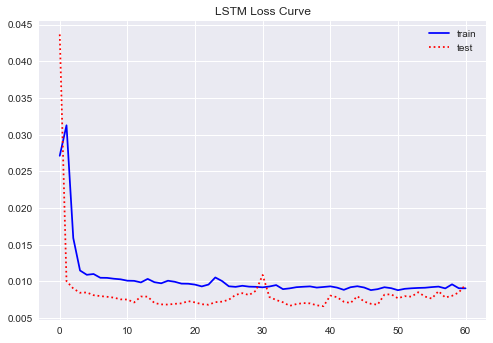

In [190]:
plt.plot(history.history['loss'],'b-',label='train')
plt.plot(history.history['val_loss'],'r:',label='test')
plt.legend()
plt.title('LSTM Loss Curve')
plt.show()

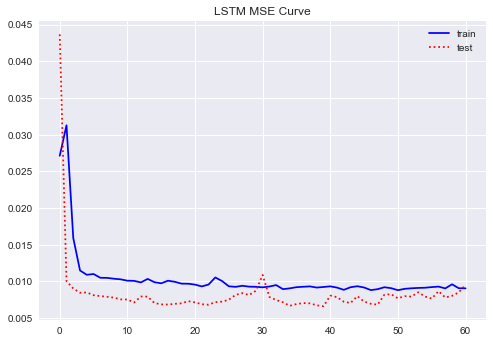

In [191]:
plt.plot(history.history['mse'],'b-',label='train')
plt.plot(history.history['val_mse'],'r:',label='test')
plt.legend()
plt.title('LSTM MSE Curve')
plt.show()

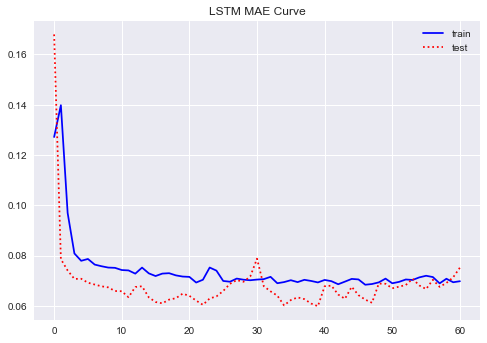

In [192]:
plt.plot(history.history['mae'],'b-',label='train')
plt.plot(history.history['val_mae'],'r:',label='test')
plt.title('LSTM MAE Curve')
plt.legend()
plt.show()

In [193]:
pw_mse, pw_val_mse = np.mean(history.history['mse']),np.mean(history.history['val_mse'])

In [194]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 250)               263000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 251       
Total params: 263,251
Trainable params: 263,251
Non-trainable params: 0
_________________________________________________________________


In [195]:
# 1 output
train_predictions = model.predict(train_pw_generator)
test_predictions = model.predict(test_pw_generator)

In [196]:
trans_label = np.transpose(label)

In [197]:
label_df = pd.DataFrame(label)

In [198]:
yhat_train_p0, yhat_test_p0 = cf.reshape_predictions(label,train_predictions[:,0],test_predictions[:,0],n_inputs)

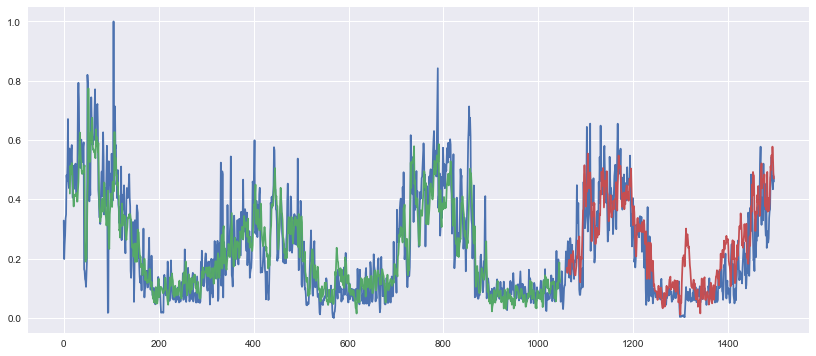

In [199]:
label_df[0].plot(figsize=(14,6))
plt.plot(yhat_train_p0)
plt.plot(yhat_test_p0)
plt.show()

Detected outliers (Power & Weather): 200


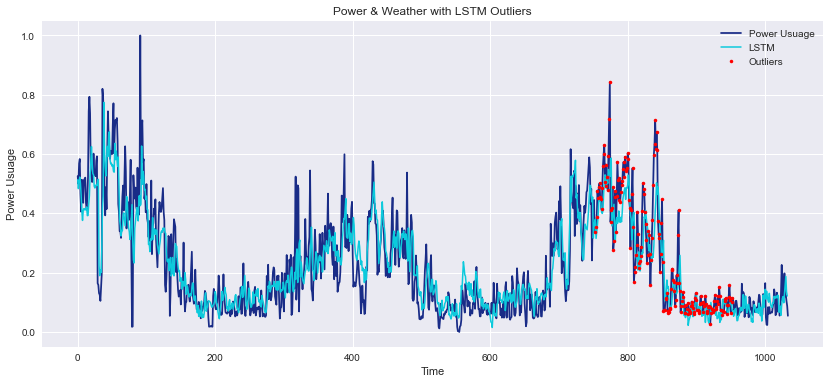

<Figure size 576x396 with 0 Axes>

In [201]:
ts = pd.Series(label[int(timesteps):len(train_predictions[:,0])+int(timesteps)])
norm_model = pd.Series(yhat_train_p0[int(timesteps):len(train_predictions)+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_train_p0)[int(timesteps):len(train_predictions)+int(timesteps)])

pw_anom = npt.detect_anomalies(ts, norm_model,\
                     'Power & Weather', 'Power Usuage', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.05)

Detected outliers (Power & Weather): 209


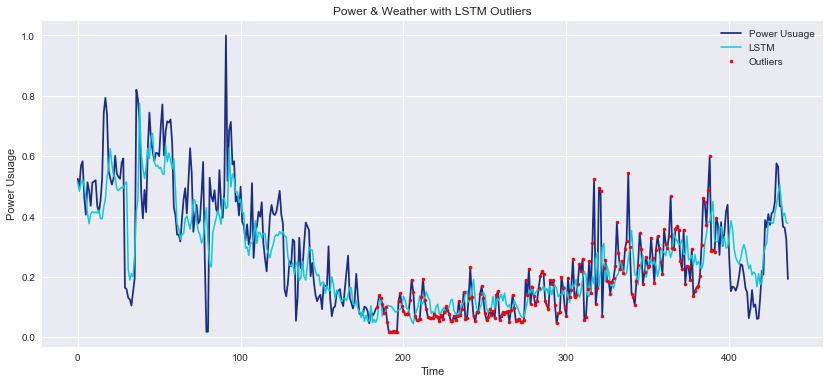

<Figure size 576x396 with 0 Axes>

In [202]:
ts = pd.Series(label[int(timesteps):len(test_predictions[:,0])+int(timesteps)])
norm_model = pd.Series(yhat_train_p0[int(timesteps):len(test_predictions)+int(timesteps)])
errors = pd.Series(npt.get_errors(label,yhat_test_p0)[int(timesteps):len(test_predictions)+int(timesteps)])

pw_anom = npt.detect_anomalies(ts, norm_model,\
                     'Power & Weather', 'Power Usuage', 'LSTM', outlier_def='dynamic', num_stds=2,p=0.1)

Although this dataset did not have as much data, it looks as though it had decent predictions. The data itself looks strongly seasonal, which the data can understand well and this dataset was also the one with the highest number of inputs, making understanding the target even stronger. 

In [248]:
mse_dict = {'Appliances':app_mse,'Appliances Validation':app_val_mse,'LASP':lasp_mse,
            'LASP Validation':lasp_val_mse, 'Thruster':thruster_mse, 
            'Thruster Validation':thruster_val_mse,'Household Power':pw_mse,
             'Household Power Validation':pw_val_mse}

In [249]:
pd.DataFrame(pd.Series(mse_dict,name='MSE'))

,MSE
Appliances,0.019523
Appliances Validation,0.010384
LASP,0.006944
LASP Validation,0.005777
Thruster,0.007884
Thruster Validation,0.007777
Household Power,0.010285
Household Power Validation,0.008318


In [250]:
anomalies = {'Appliances':1383,'LASP':[2846,630,1774,0],
            'Thruster':0, 
            'Household Power':209}

In [251]:
pd.DataFrame(pd.Series(anomalies,name='Anomalies Detected'))

,Anomalies Detected
Appliances,1383
LASP,"[2846, 630, 1774, 0]"
Thruster,0
Household Power,209
